**This notebook will be a comprehensive look into clinical data collected on patients who either have a high likelihood of stroke or have had a stroke. This will be the breakdown of exploration:**

1. EDA
2. Population --> Sample
3. Hypothesis Testing
4. Probability
5. Stroke Prediction

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [19]:
df = pd.read_csv("train_2v.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


Here is a breakdown of what each feature/variable means:

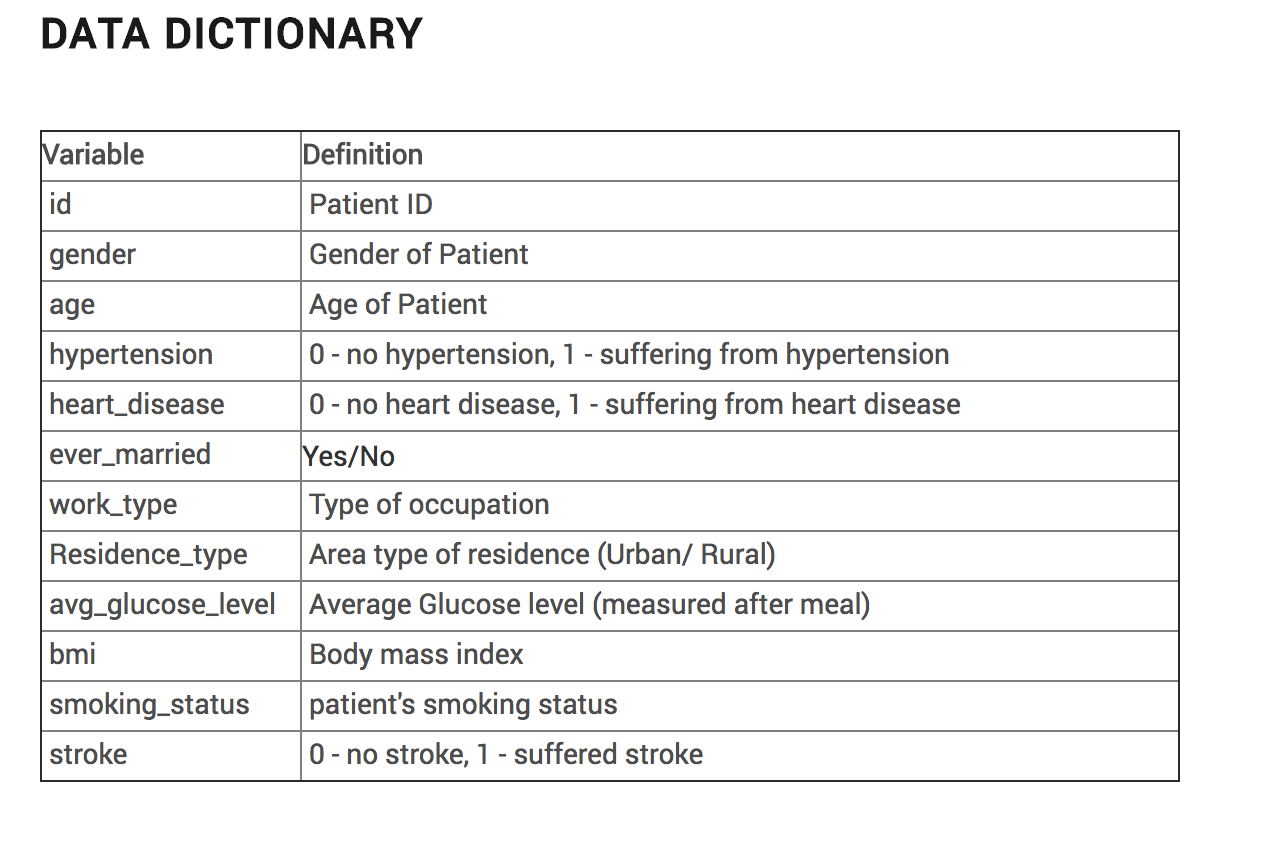

In [5]:
from IPython.display import Image
Image(filename = 'var_exp.png', width = 400, height = 400)

# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


There is a total of 43,400 rows with 12 columns.

We definitely need to convert some column values into float/integers so that there can be calculations performed on them. This will be done after some EDA.

In [11]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

Most NULL's are in bmi and smoking_status.

In [7]:
temp_series = df['gender'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Gender Distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="gender_percentages")

Good thing we plotted because see that there is <1% "Other". Not all patients are classifed as M/F.

Let's see the distribution of age across all patients.

In [16]:
cnt_srs = df['age'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color = cnt_srs.values,
        colorscale= 'agsunset',
        showscale=True
    ),
)
layout = go.Layout(
    title='Age Distribution',
    xaxis_title="Age",
    yaxis_title="Count"
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="age_dist")

We can somewhat tell what most of the patients' ages are, but let's bin the ages in decades to determine where exactly do most patients fall on the age spectrum.

In [21]:
import plotly.express as px

fig = px.histogram(df, x="age", nbins=10)
fig.show()

Much better. Most patients are in the range between 45 years and 54 years old. 

The inital bin has negative number in its range. Let's take a look at the distribution of age with desciptive statistics output.

In [24]:
df.age.describe()

count    43400.000000
mean        42.217894
std         22.519649
min          0.080000
25%         24.000000
50%         44.000000
75%         60.000000
max         82.000000
Name: age, dtype: float64

In [27]:
len(df.loc[(df['age'] <= 0.08)])

17

17 rows of 0.08 age (1 month old). The range of patients' ages is huge - from 1 month old to 82 years old.

In [30]:
cnt_srs = df['hypertension'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color = cnt_srs.values,
        colorscale= 'agsunset',
        showscale=True
    ),
)
layout = go.Layout(
    title='Hypertension Distribution',
    xaxis_title="Hypertension (0-No, 1-Yes)",
    yaxis_title="Count"
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="hyp_dist")

Majority of patients do NOT have Hypertension.

In [32]:
cnt_srs = df['heart_disease'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color = cnt_srs.values,
        colorscale= 'tealrose',
        showscale=True
    ),
)
layout = go.Layout(
    title='Heart Disease Distribution',
    xaxis_title="Heart Disease (0-No, 1-Yes)",
    yaxis_title="Count"
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="heart_dist")

Most patients don't have heart disease.

In [33]:
cnt_srs = df['ever_married'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color = cnt_srs.values,
        colorscale= 'blues',
        showscale=True
    ),
)
layout = go.Layout(
    title='Married Distribution',
    xaxis_title="Married",
    yaxis_title="Count"
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="married_dist")

Wow, only half of the patient population is married. 

In [34]:
temp_series = df['work_type'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Work_Type Distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="work_percentages")

Most people work for the private industry. So somewhat fast-paced versus the slower goverment jobs.

In [36]:
cnt_srs = df['Residence_type'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color = cnt_srs.values,
        colorscale= 'agsunset',
        showscale=True
    ),
)
layout = go.Layout(
    title='Residence Type Distribution',
    xaxis_title="Residence Type",
    yaxis_title="Count"
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="res_dist")

This is pretty much a 50/50 split between patients that reside in the city and those that reside further away from the hustle and bustle of the city. 

In [46]:
fig = px.box(df, y="avg_glucose_level")
fig.show()

There is a huge skew towards the higher end. Outliers are many beyond the max.

In [47]:
fig = px.box(df, y="bmi")
fig.show()

In [49]:
cnt_srs = df['smoking_status'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color = cnt_srs.values,
        colorscale= 'blues',
        showscale=True
    ),
)
layout = go.Layout(
    title='Smoking Status Distribution',
    xaxis_title="Smoking Status",
    yaxis_title="Count"
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="smoke_dist")

Majority never smoked and those who formerly smoked about 1000 more than those who smoke.

Last. but not least, let us see the distribution of patients who have had a stroke.

In [50]:
cnt_srs = df['stroke'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color = cnt_srs.values,
        colorscale= 'tealrose',
        showscale=True
    ),
)
layout = go.Layout(
    title='Stroke Distribution',
    xaxis_title="Stroke (0-No, 1-Yes)",
    yaxis_title="Count"
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="stroke_dist")

Majority of patients have not had a stroke.

Now, let us look at some relationships!